In [48]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("test_scores.csv")

In [3]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null object
school_type        2133 non-null object
classroom          2133 non-null object
teaching_method    2133 non-null object
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null object
lunch              2133 non-null object
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


There are a lot of the data that is strings that needs to be converted into number. 

Maybe student_id might be not be usefull afterwards.

In [5]:
#Remove the variable student_id which is not usefull
data = data.drop(columns=['student_id'])

In [6]:
#The data is transformed into categorical.
for col in ['school' ,'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']:
    data[col] = data[col].astype('category')


In [7]:
#enconding the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in ['school' , 'school_setting', 'school_type', 'classroom', 'teaching_method', 'gender', 'lunch']:
    le.fit(data[col])
    data[col] = le.transform(data[col])
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,2,0,22,1,20.0,0,0,62.0,72.0
1,0,2,0,22,1,20.0,0,0,66.0,79.0
2,0,2,0,22,1,20.0,1,0,64.0,76.0
3,0,2,0,22,1,20.0,0,0,61.0,77.0
4,0,2,0,22,1,20.0,1,0,64.0,76.0


In [8]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train,test = split_train_test(data, 0.2)
x_test = test.drop('posttest',axis = 1)
x_train = train.drop('posttest',axis = 1)
y_test = test['posttest'].values
y_train = train['posttest'].values

Before analyse the feature, lets use all data to predict the students score.

Let's use linear Regretion

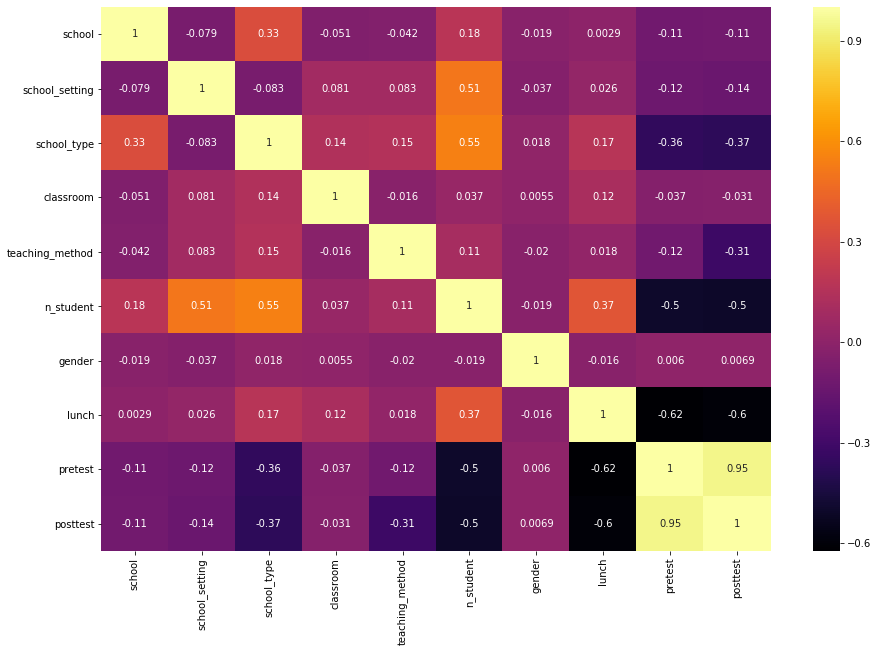

In [9]:
#Check the correlation betweem the features
import seaborn as sns
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="inferno")

In [82]:
#Function to select the training and test data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
reg = LinearRegression().fit(scaler.fit_transform(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]), y_train)
predictions = reg.predict(scaler.fit_transform(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]))

errors = mean_squared_error(predictions,y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)
print(predictions)

10.989496779769484
3.3150409921703057
[ 75.15368368  78.62567278  74.54102975  55.64230192  67.5682654
  43.60733626  62.43782297  55.78156559  71.46903457  74.6290805
  75.08144778  57.97246994  42.42085225  53.25576559  77.81989876
  72.26755232  64.68592122  68.87036392  82.56982959  68.5553972
  70.23448048  39.63934093  66.80753792  68.52647296  68.70050375
  68.68026698  64.24274726  38.67855953  76.04222917  45.07370662
  76.24286169  84.34974572  72.23971902  37.38745549  82.21449878
  66.11288952  75.87892858  73.67427088  68.78231318  92.71085818
  58.24475976  54.355047    58.18390757  45.29117796  81.25371738
  50.07548289  61.89077965  55.64454846  48.53842648  71.7777782
  76.76528948  88.16427433  57.5360314   76.94780286  67.11686015
  54.83556586  80.65051334  69.51617859  45.29117796  54.0510618
  64.78450754  74.07908894  71.1424991   80.69022448  57.01168855
  57.15910859  79.96864706  71.13652732  74.12066639  45.74258321
  79.81460172  80.3057181   86.50902959  79

In [81]:
#Function to select the training and test data
reg = LinearRegression().fit(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]], y_train)
predictions = reg.predict(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])

errors = mean_squared_error(predictions,y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)


10.290143676613456
3.20782538125339


In [86]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


regr =  MLPRegressor(random_state=1, max_iter=1000)
regr.fit(scaler.fit_transform(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]]), y_train)
predictions = regr.predict(scaler.fit_transform((x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])))

errors = mean_squared_error(predictions,y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)

10.783825457634688
3.283873544708244


In [113]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor()
gbrt.fit(scaler.fit_transform(min_max_scaler.fit_transform(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])), y_train)
predictions = gbrt.predict(scaler.fit_transform(min_max_scaler.fit_transform(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])))

errors = mean_squared_error(np.round(predictions),y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)

11.01643192488263
3.319101071808846


In [114]:
gbrt = GradientBoostingRegressor()
gbrt.fit(x_train[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]], y_train)
predictions = gbrt.predict(x_test[["n_student","pretest", "school_type","teaching_method","gender","lunch","school_setting"]])

errors = mean_squared_error(np.round(predictions),y_test)
print(errors)
tree_rmse = np.sqrt(errors)
print(tree_rmse)

9.835680751173708
3.13618888958776


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 10 columns):
school             2133 non-null int32
school_setting     2133 non-null int32
school_type        2133 non-null int32
classroom          2133 non-null int32
teaching_method    2133 non-null int32
n_student          2133 non-null float64
gender             2133 non-null int32
lunch              2133 non-null int32
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(3), int32(7)
memory usage: 108.4 KB


In [105]:
y_test

array([72., 82., 79., 55., 68., 41., 68., 57., 69., 77., 74., 60., 42.,
       56., 81., 78., 68., 72., 83., 65., 73., 42., 68., 69., 69., 67.,
       68., 43., 70., 46., 76., 81., 73., 47., 84., 65., 74., 71., 73.,
       91., 55., 56., 58., 40., 82., 47., 64., 60., 47., 73., 74., 82.,
       59., 75., 74., 58., 78., 62., 51., 52., 61., 68., 73., 79., 57.,
       60., 76., 70., 69., 51., 79., 80., 81., 86., 85., 66., 82., 54.,
       57., 57., 61., 78., 62., 55., 70., 85., 70., 73., 69., 64., 55.,
       77., 61., 87., 77., 94., 58., 61., 70., 70., 48., 94., 65., 50.,
       93., 57., 39., 90., 71., 76., 80., 59., 85., 70., 55., 79., 40.,
       61., 88., 48., 93., 73., 56., 87., 79., 68., 79., 77., 68., 55.,
       84., 80., 43., 90., 68., 66., 59., 60., 83., 62., 54., 84., 51.,
       43., 76., 84., 65., 94., 58., 59., 94., 54., 56., 74., 54., 56.,
       79., 60., 82., 72., 63., 71., 67., 48., 55., 75., 66., 65., 68.,
       77., 69., 56., 65., 66., 67., 60., 62., 68., 59., 57., 72